In [88]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

     |████████████████████████████████| 11.5 MB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 12.1 MB/s eta 0:00:01
You should consider upgrading via the '/mnt/d/Biometrics Project/python/venv/bin/python -m pip install --upgrade pip' command.


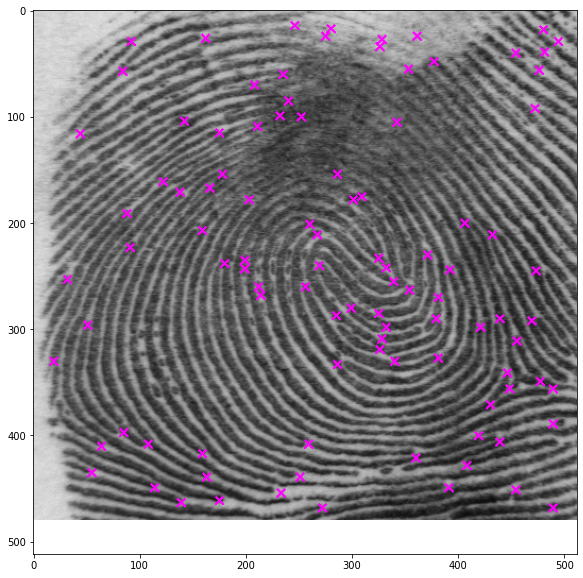

uint8 (512, 512, 3)


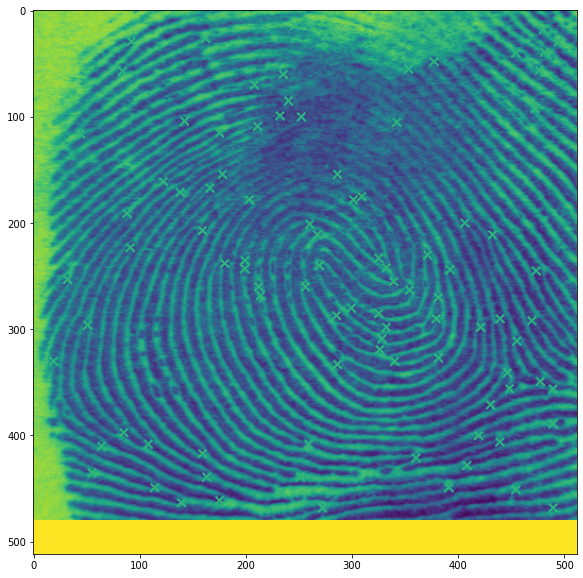

uint8 (512, 512)


In [89]:
src = cv.imread("/mnt/d/Biometrics Project/python/open_fields_examples/f0010_01_min.bmp")
plt.imshow(src)
plt.show()
print(src.dtype, src.shape)
gray_src = cv.imread("/mnt/d/Biometrics Project/python/open_fields_examples/f0010_01_min.bmp", cv.IMREAD_GRAYSCALE)
plt.imshow(gray_src)
plt.show()
print(gray_src.dtype, gray_src.shape)

uint8 (512, 512)


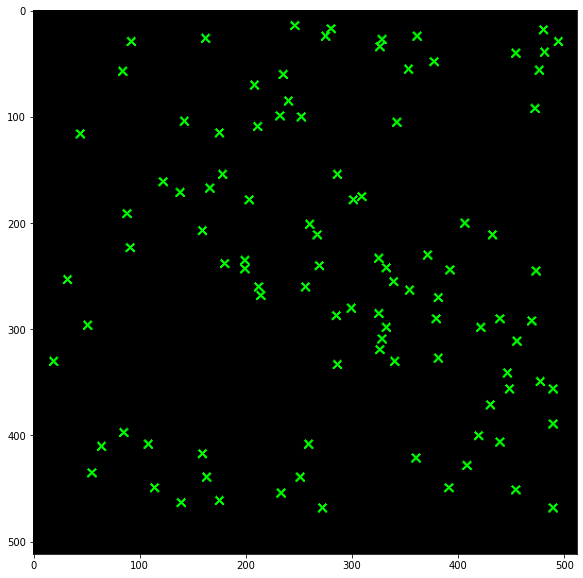

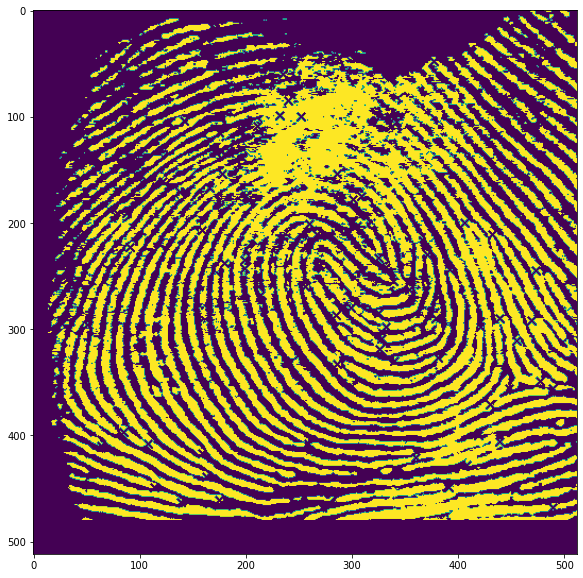

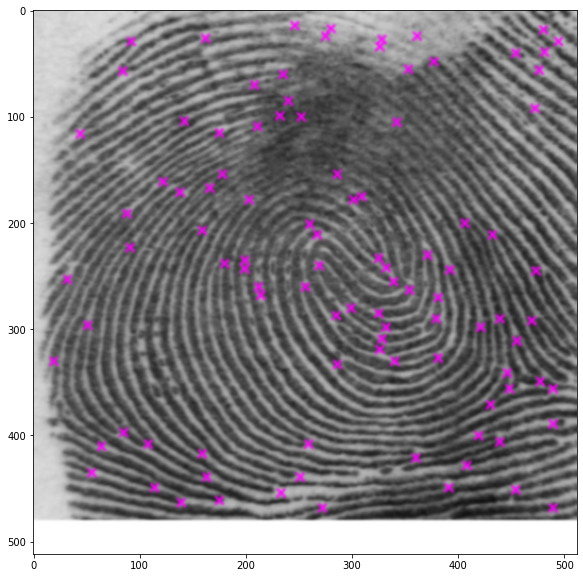

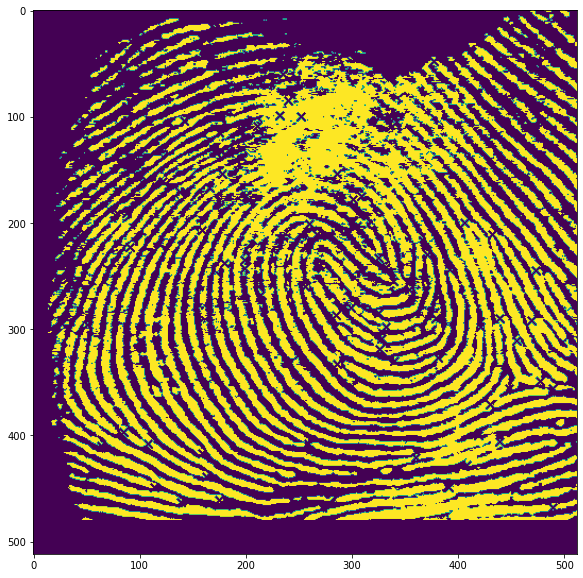

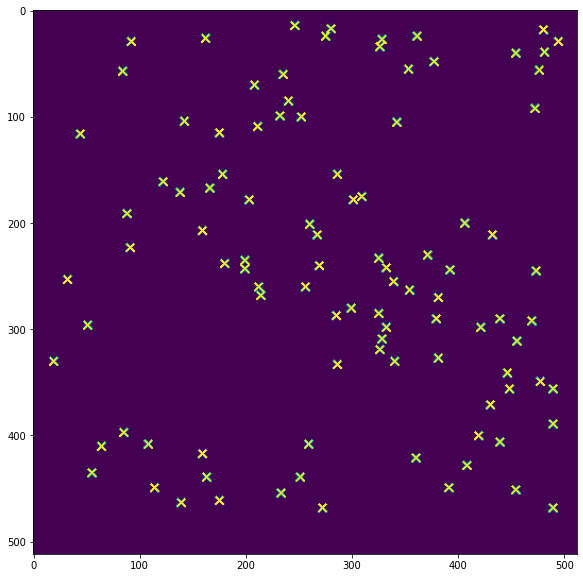

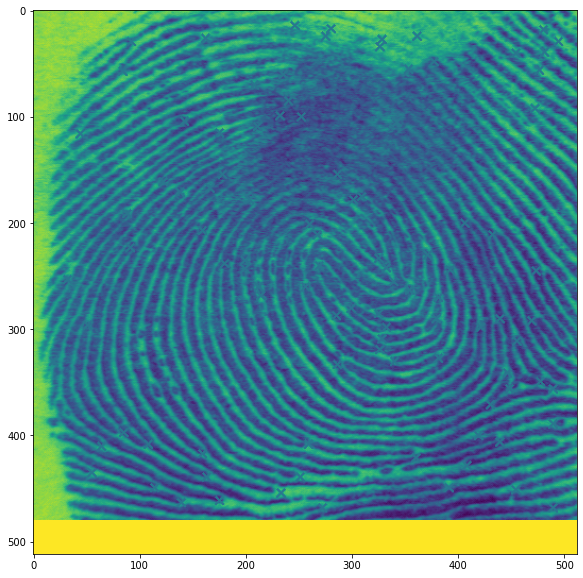

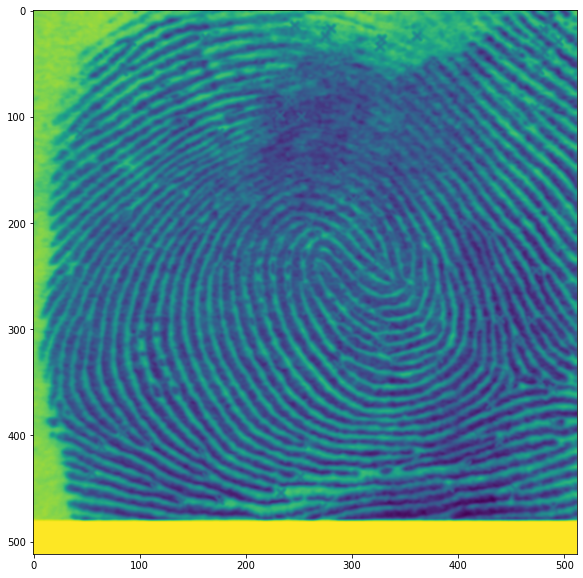

In [90]:
ROI = np.zeros(src.shape, np.uint8)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY) 
#gray_img = plt.imshow(gray)
print(gray.dtype, gray.shape)

im_gray = cv.GaussianBlur(src, (5, 5), 0)

#ret, im_th = cv.threshold(im_gray, 90, 255, cv.THRESH_BINARY_INV)
ret, im_th_1 = cv.threshold(src, 0, 255, cv.THRESH_BINARY_INV)
ret, im_th_2 = cv.threshold(gray_src, 90, 255, cv.THRESH_BINARY_INV)
ret, im_th = cv.threshold(gray, 90, 255, cv.THRESH_BINARY_INV)
plt.imshow(im_th_1)
plt.show()
plt.imshow(im_th_2)
plt.show()
plt.imshow(im_gray)
plt.show()
plt.imshow(im_th)
plt.show()
#gray = cv.cvtColor(im_th, cv.COLOR_BGR2GRAY) 
#plt.imshow(gray)
#plt.show()
gray = cv.cvtColor(im_th_1, cv.COLOR_BGR2GRAY) 
plt.imshow(gray)
plt.show()
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY) 
plt.imshow(gray)
plt.show()
gray = cv.cvtColor(im_gray, cv.COLOR_BGR2GRAY) 
plt.imshow(gray)
plt.show()

(512, 512) uint8


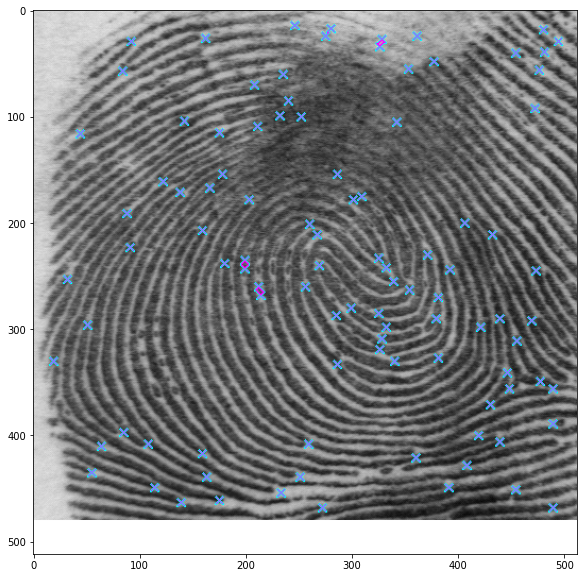

In [97]:
print(im_th_1.shape, im_th_1.dtype)
#im_th_1 = cv.cvtColor(im_th_1, cv.COLOR_RGB2GRAY) 

ctrs, hier = cv.findContours(im_th_1.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#print(ctrs)
img = cv.drawContours(src.copy(), ctrs, -1, (0,255,255), 1)
plt.imshow(img)
plt.show()

# ctrs, hier = cv.findContours(gray.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# #print(ctrs)
# img = cv.drawContours(src.copy(), ctrs, -1, (0,255,255), 1)
# plt.imshow(img)
# plt.show()




#image, ctrs, hier = cv.findContours(gray.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#image, ctrs, hier = cv.findContours(im_th_1.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#image, ctrs, hier = cv.findContours(im_gray.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#image, ctrs, hier = cv.findContours(src.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#image, ctrs, hier = cv.findContours(im_th.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

/mnt/d/Biometrics Project/python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


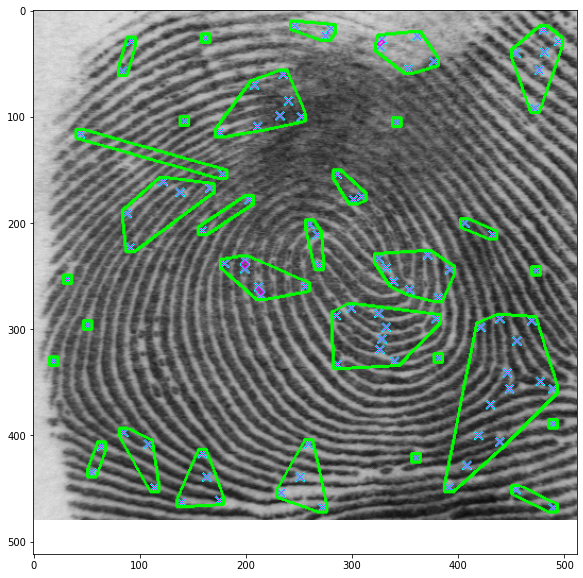

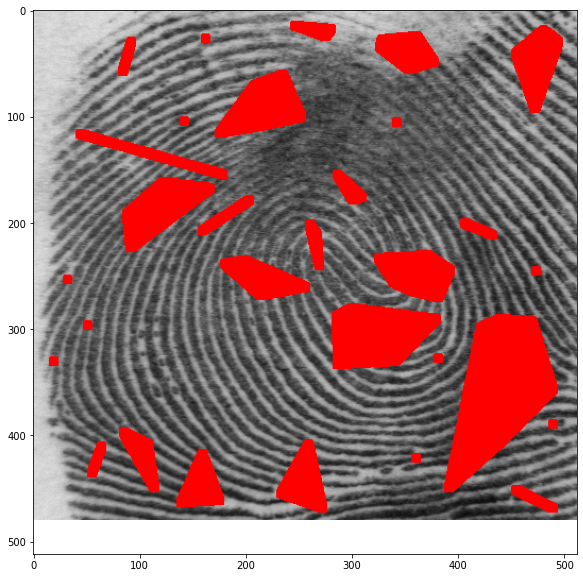

In [98]:
contours = ctrs
def find_if_close(cnt1,cnt2):
    row1,row2 = cnt1.shape[0],cnt2.shape[0]
    for i in range(row1):
        for j in range(row2):
            dist = np.linalg.norm(cnt1[i]-cnt2[j])
            if abs(dist) < 35 :
                return True
            elif i==row1-1 and j==row2-1:
                return False
            
            
LENGTH = len(ctrs)
status = np.zeros((LENGTH,1))

for i,cnt1 in enumerate(contours):
    x = i    
    if i != LENGTH-1:
        for j,cnt2 in enumerate(contours[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status[i],status[x])
                status[x] = status[i] = val
            else:
                if status[x]==status[i]:
                    status[x] = i+1

unified = []
maximum = int(status.max())+1
for i in range(maximum):
    pos = np.where(status==i)[0]
    if pos.size != 0:
        cont = np.vstack(contours[i] for i in pos)
        hull = cv.convexHull(cont)
        unified.append(hull)

img_1 = cv.drawContours(img.copy(),unified,-1,(0,255,0),2)
#img_3 = cv.drawContours(thresh,unified,-1,255,-1)


img_2 = cv.drawContours(src.copy(), unified, -1, 255, -1)
plt.imshow(img_1)
plt.show()
plt.imshow(img_2)
plt.show()




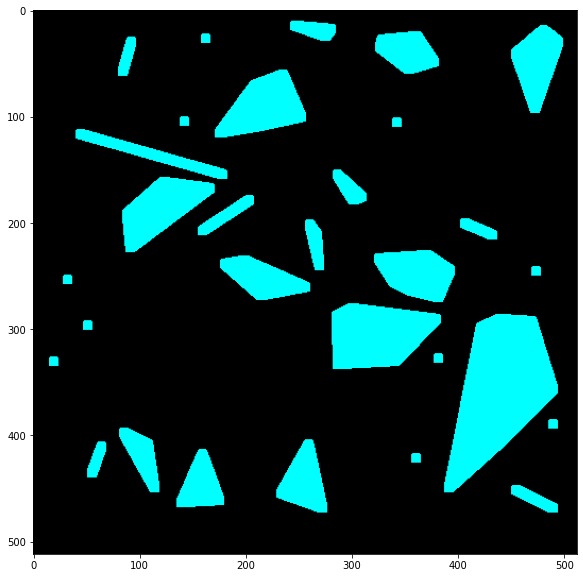

In [102]:
ret, im_g = cv.threshold(img_2, 0, 255, cv.THRESH_BINARY_INV)
plt.imshow(im_g)
plt.show()

In [20]:
ret, binary = cv.threshold(gray, 0, 255, 
                cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE)  # Adaptive Binarization
 
out_binary, contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, 
                                    cv.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)